In [1]:
include("../LiPoSID.jl")
using LinearAlgebra
using Combinatorics
using Plots
using HDF5

Trace distance:

$D(\rho_1, \rho_2) = \frac{1}{2} \operatorname{Tr}|\rho_1 - \rho_2|$,

where $|A| = \sqrt{A^\dagger A}$

Non-Markovianity:

(H.-P. Breuer, E.-M. Laine, J. Piilo, "Measure for the Degree of Non-Markovian Behavior of Quantum Processes in Open Systems," Physical Review Letters, 2009.)

$\sigma = \frac{dD}{dt}$

$ \mathcal{N} = \max_{\rho_1(0), \rho_2(0)}{\int_{\sigma>0}{\sigma dt}} $

In [2]:
function TrDist(ρ₁, ρ₂)
    A = ρ₁-ρ₂
    D = tr(sqrt(A'*A))/2
    if abs(imag(D))>1e-6
        throw(DomainError(D, "Trace distance is complex number"))
    else
        return(real(D))
    end
end    

ρ₁ = [1 im
      -im 0]

ρ₂ = [.99 im
      -im .01]      

TrDist(ρ₁, ρ₂)

0.010000000000000005

In [3]:
data_dir = ""
println(data_dir)

γ = [ "25.133", "79.477", "251.33"]

basis_files = ["State_B"*string(n) for n=1:6];

In [21]:
function NonMarkovianityB4(γᵢ)
    N=[]
    for (i,j)  in combinations(1:4, 2)
        ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*basis_files[i]*"_data.h5", γᵢ)
        ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*basis_files[j]*"_data.h5", γᵢ)
        dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
        append!(N,sum(dD[dD.>0]))
    end
    maximum(N)
end  

NonMarkovianityB4 (generic function with 1 method)

In [12]:
function NonMarkovianity(γᵢ)
    N=[]
    for (i,j)  in combinations(1:6, 2)
        ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*basis_files[i]*"_data.h5", γᵢ)
        ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*basis_files[j]*"_data.h5", γᵢ)
        dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
        append!(N,sum(dD[dD.>0]))
    end
    maximum(N)
end    

NonMarkovianity(γ[end])

0.0014914775584726758

In [13]:
NonMarkovianity(γ[1])

0.09563158484584189

In [22]:
NB4 = [ NonMarkovianityB4(γᵢ) for γᵢ in γ ]

3-element Vector{Float64}:
 0.04187746492180401
 0.0016176163814664163
 0.0006399448334512003

In [23]:
plot(NB4, xticks = (1:length(γ), γ), legend = false)
#title!("Breuer Non-Markovianity Measure")
xlabel!("Coupling, γ")
ylabel!("non-Markovianity measure B4 new, N")
savefig("NonMarkovianityLargeGammasB4new.png")

"/home/zah/github/OQSID-thesis/LARGE_GAMMAS/NonMarkovianityLargeGammasB4new.png"

In [14]:
N = [NonMarkovianity(γᵢ) for γᵢ in γ]

h5open("NonMarkovianity_by_gamma.h5","cw") do fid
    fid["N"] = convert.(Float64, N)        
end

3-element Vector{Float64}:
 0.09563158484584189
 0.002938479869276589
 0.0014914775584726758

In [19]:
plot(N, xticks = (1:length(γ), γ), legend = false)
#title!("Breuer Non-Markovianity Measure")
xlabel!("Coupling, γ")
ylabel!("non-Markovianity measure, N")
savefig("NonMarkovianityLargeGammas.png")

"/home/zah/github/OQSID-thesis/LARGE_GAMMAS/NonMarkovianityLargeGammas.png"

0.0005888035244951406

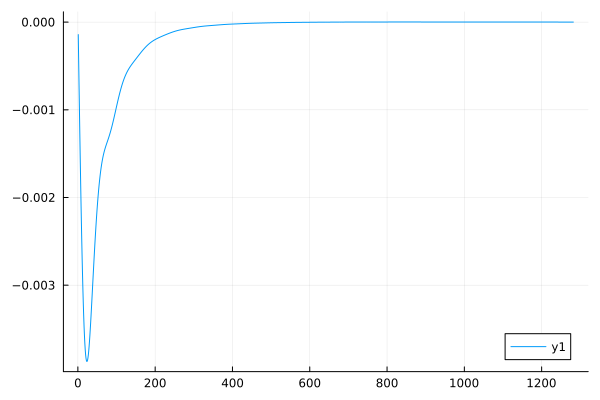

In [16]:
ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*basis_files[5]*"_data.h5", γ[end])
ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*basis_files[6]*"_data.h5", γ[end])
dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
print(sum(dD[dD.>0]))
plot(dD)

0.0010341975202761283

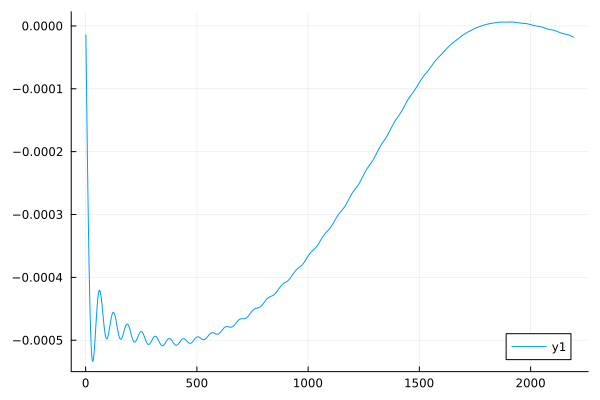

In [17]:
ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*basis_files[5]*"_data.h5", γ[1])
ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*basis_files[6]*"_data.h5", γ[1])
dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
print(sum(dD[dD.>0]))
plot(dD)

0.0

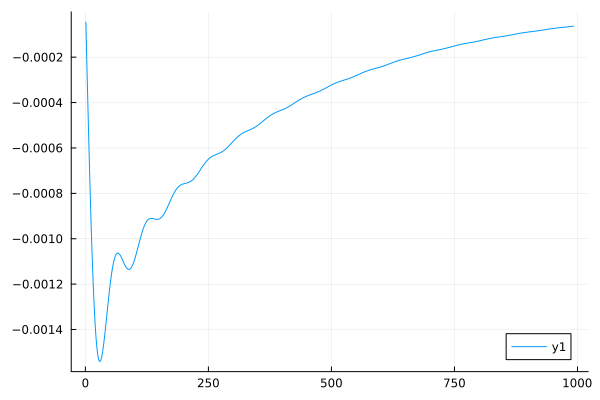

In [18]:
ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*basis_files[5]*"_data.h5", γ[2])
ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*basis_files[6]*"_data.h5", γ[2])
dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
print(sum(dD[dD.>0]))
plot(dD)